In [11]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
filename = "color/11.2.jpg"
f = Image.open(filename)
print(f.info)
print(f.size)

{'jfif_version': (1, 2), 'dpi': (600, 600), 'jfif_density': (600, 600), 'jfif': 258, 'jfif_unit': 1}
(10200, 6600)


In [37]:
width, height = f.size
left = f.crop((0, 0, width/2, height))
right = f.crop((width/2, 0, width, height))

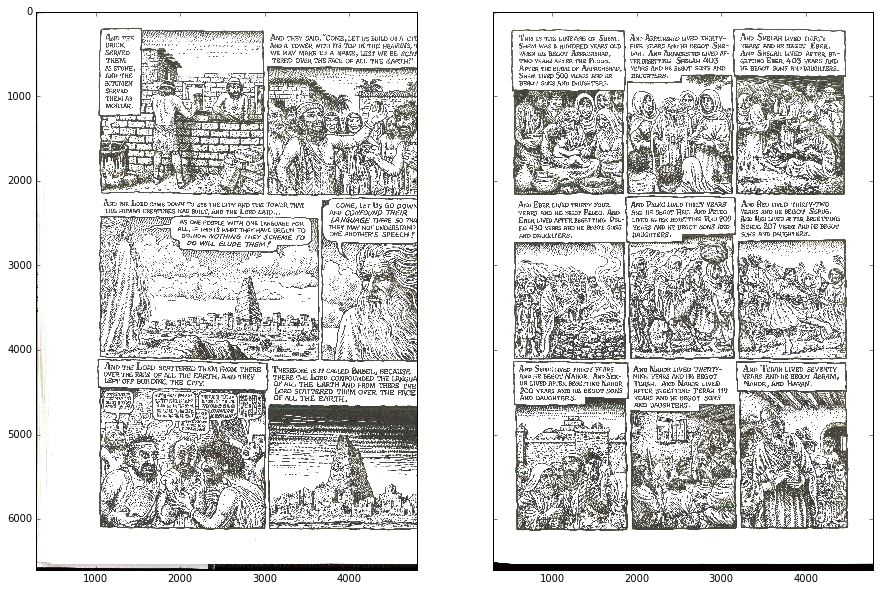

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].imshow(np.asarray(left))
axes[1].imshow(np.asarray(right))

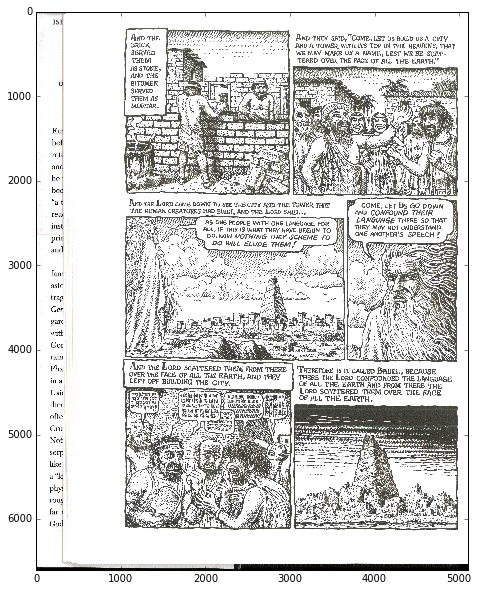

In [5]:
imshow(np.asarray(left))

In [56]:
mono = left.convert('L')
mono = np.array(mono)

cutoff = 120
a = mono.flatten()
a[a < cutoff] = 0
a[a >= cutoff] = 255

a = np.reshape(a, (6600, 5100)).astype('uint8')
clean = Image.fromarray(a)
draw = ImageDraw.Draw(clean)

x1, x2 = 950, 5050
draw.line((x1, 0, x1, 6600), width=10)
draw.line((x2, 0, x2, 6600), width=10)

y1, y2 = 100, 6200
draw.line((0, y1, 5100, y1), width=10)
draw.line((0, y2, 5100, y2), width=10)


In [48]:
mono = right.convert('L')
mono = np.array(mono)

cutoff = 120
a = mono.flatten()
a[a < cutoff] = 0
a[a >= cutoff] = 255

a = np.reshape(a, (6600, 5100)).astype('uint8')
clean = Image.fromarray(a)
draw = ImageDraw.Draw(clean)

x1, x2 = 400, 4600
draw.line((x1, 0, x1, 6600), width=10)
draw.line((x2, 0, x2, 6600), width=10)

y1, y2 = 100, 6200
draw.line((0, y1, 5100, y1), width=10)
draw.line((0, y2, 5100, y2), width=10)

clean.size

(5100, 6600)

In [54]:
def monoize(img, cutoff=120):
    width, height = img.size
    mono = img.convert('L')
    mono = np.array(mono)
    
    x = mono.flatten()
    x[x < cutoff] = 0
    x[x >= cutoff] = 255
    
    x = np.reshape(x, (height, width)).astype('uint8')
    return Image.fromarray(x)

In [57]:
m = monoize(right)

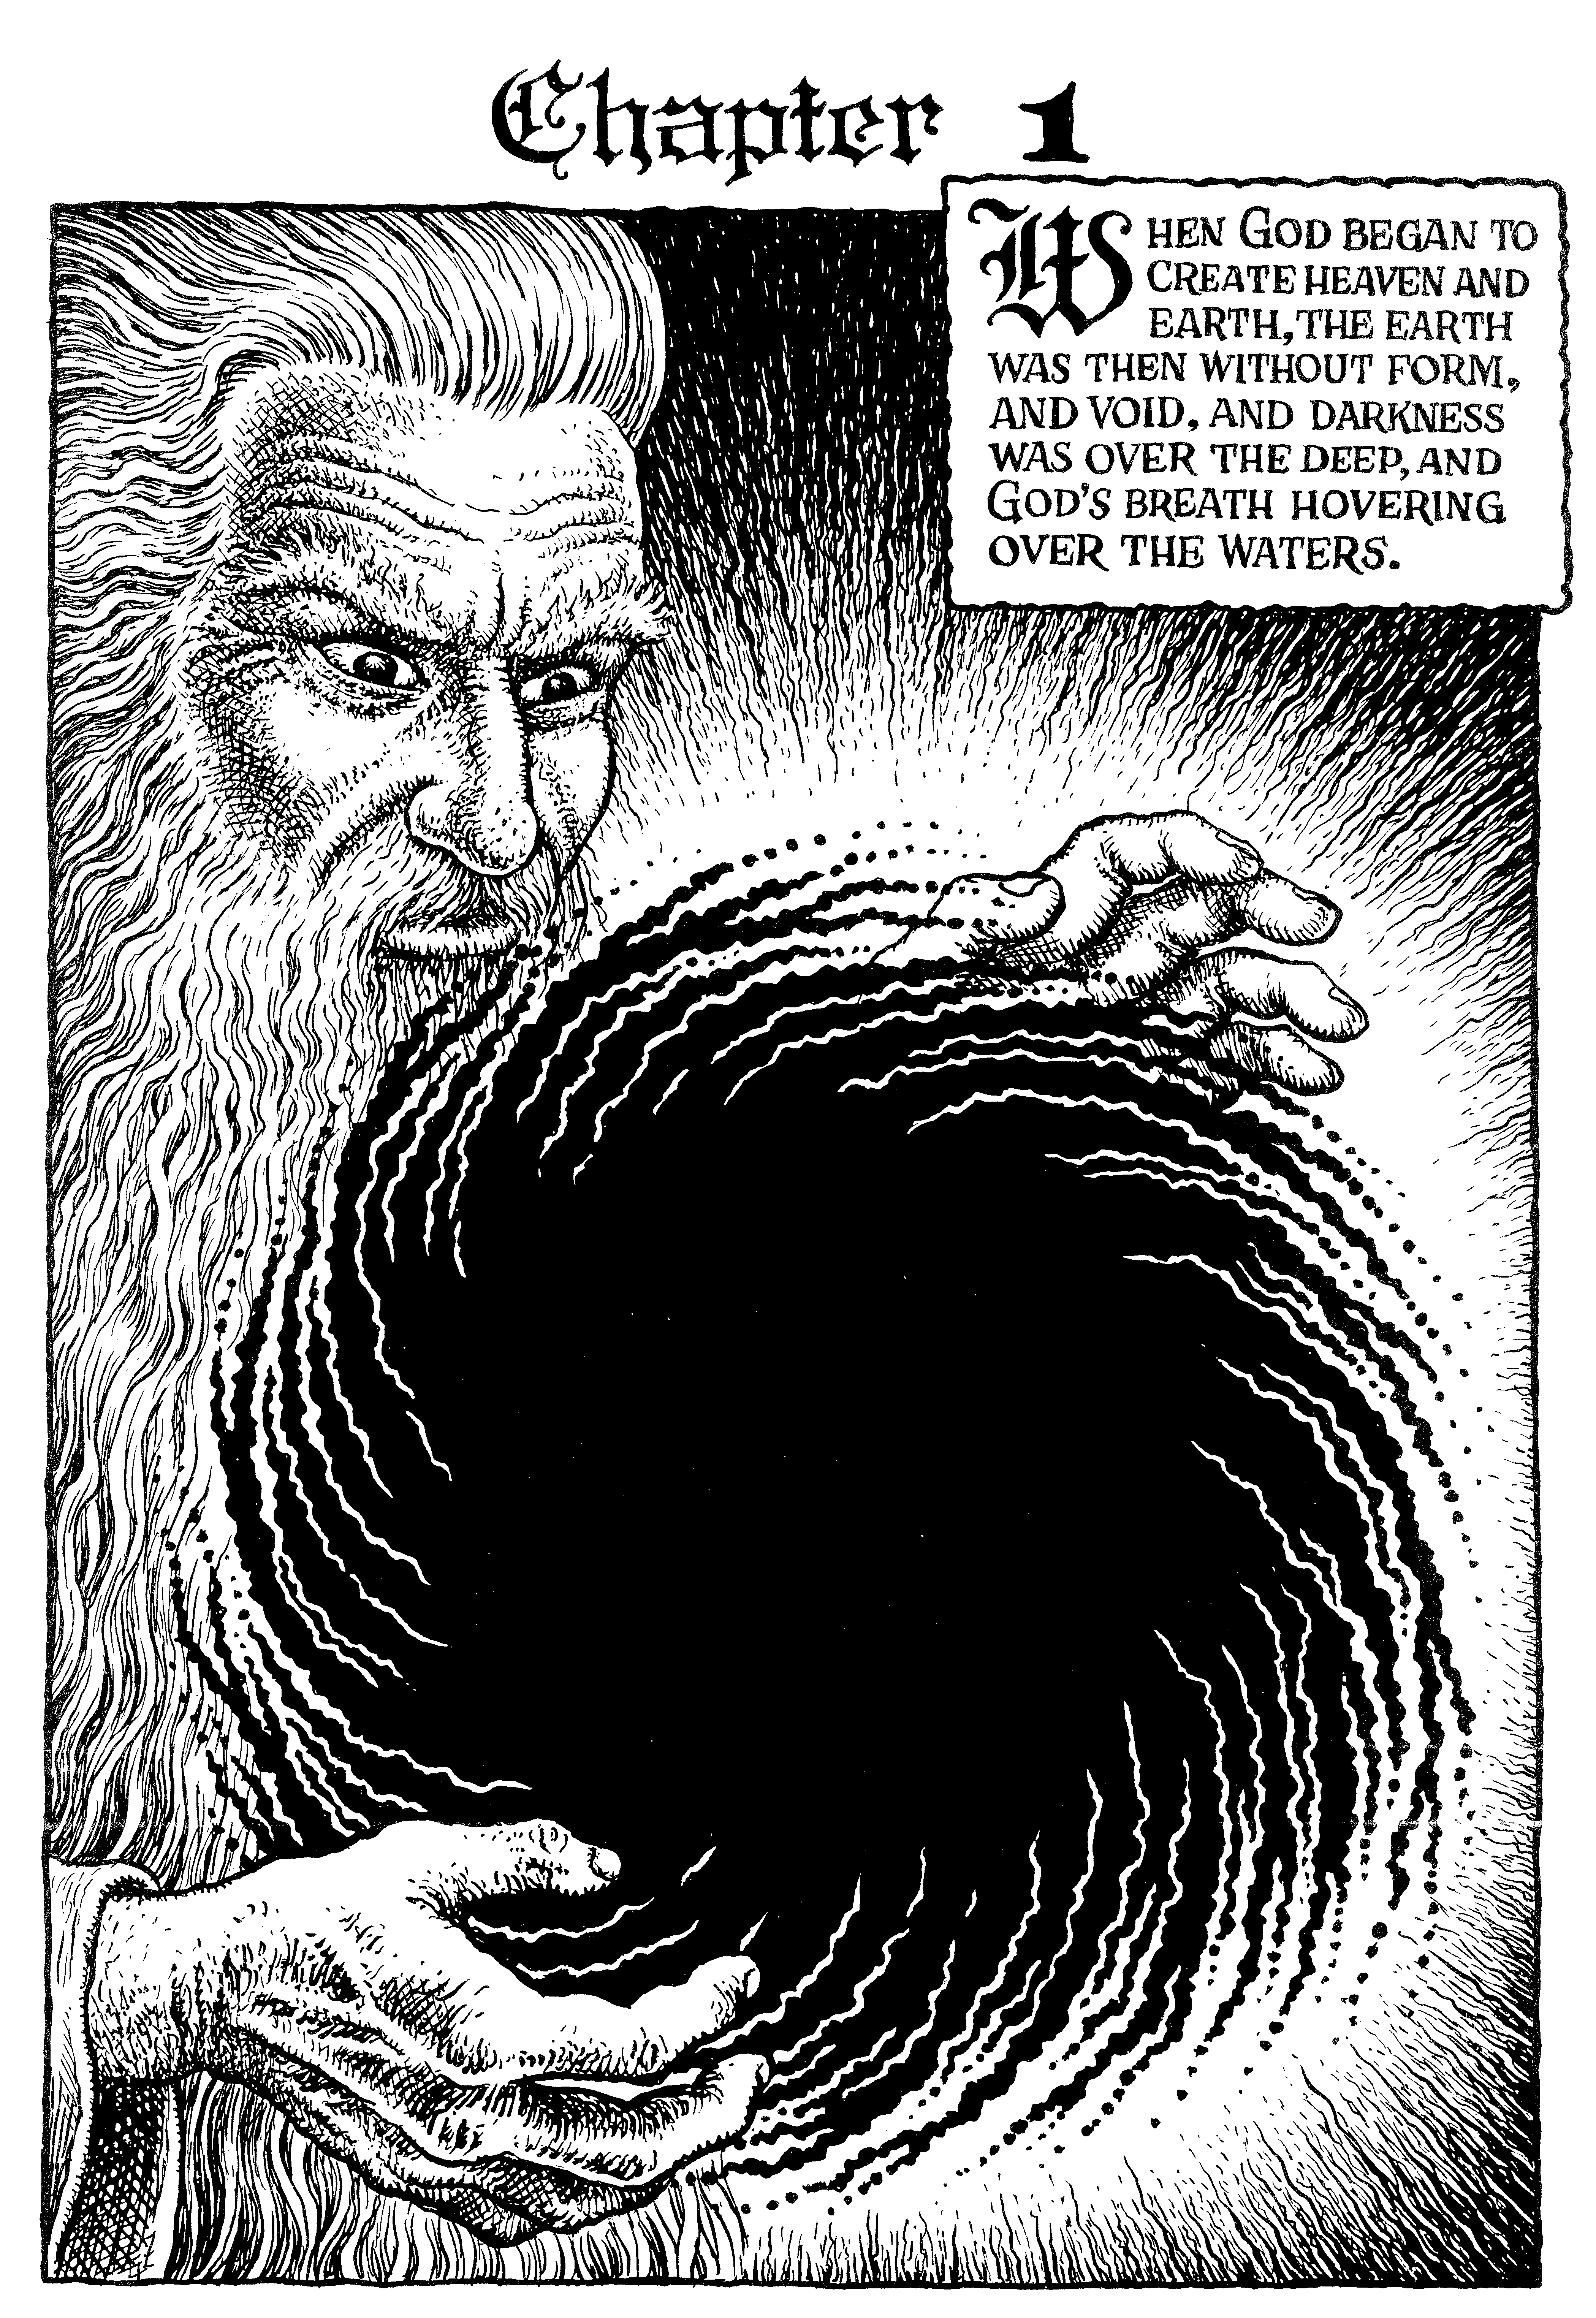

In [70]:
filepath = 'color/01.1.jpg'
leftbox = (900, 100, 5100, 6200)
rightbox=(400, 100, 4600, 6200)

image = Image.open(filepath)
    
# Get the left and right sides.
width, height = image.size
left = image.crop((0, 0, width/2, height))
right = image.crop((width/2, 0, width, height))

# Crop left and right sides.
left = left.crop(leftbox)
right = right.crop(rightbox)

# Convert to mono.
cutoff = 120
width, height = right.size
mono = right.convert('L')
mono = np.array(mono)

# Clean up using cutoff value.
x = mono.flatten()
x[x < cutoff] = 0
x[x >= cutoff] = 255

x = np.reshape(x, (height, width)).astype('uint8')
s = Image.fromarray(x)
s

In [72]:
import skimage